In [51]:
import os
import numpy as np
import random

# 指定文件夹路径
# download_save_path = 'E:/Dataset/wind_shear/Data_Download'
exception_save_path = '../Dataset/Exception_Data'

# 获取文件夹下的所有文件名称
# download_folder_names = [item for item in os.listdir(download_save_path) if os.path.isdir(os.path.join(download_save_path, item))]
exception_folder_names = [item for item in os.listdir(exception_save_path) if os.path.isdir(os.path.join(exception_save_path, item))]
instruction_folder_names = ["@Instructions"]

# 生成所有文件夹路径
# download_folder_paths = [os.path.join(download_save_path, item) for item in download_folder_names]
exception_folder_paths = [os.path.join(exception_save_path, item) for item in exception_folder_names]

# 指定工作文件夹
work_folder_path = exception_folder_paths[0]

# 指定工作mat名称
work_mat_name = os.listdir(work_folder_path)[2]

[0 1 2]


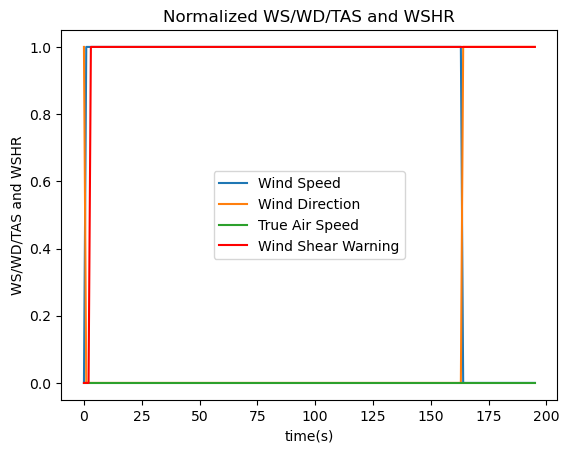

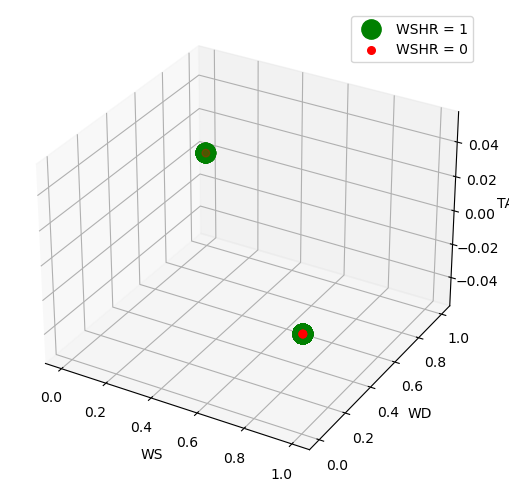

In [59]:
# 提取WS, WD, TAS并进行重采样
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

variable_list = ["WS", "WD", "TAS"]

work_mat = loadmat(os.path.join(work_folder_path, work_mat_name))

# 初始化采样数据list
sampling_data_list = []
wshr_data = work_mat["WSHR"][0][0][0]
for var_name in variable_list:
    var_data, var_rate = work_mat[var_name][0][0][0], work_mat[var_name][0][0][1][0][0]
    # 对每个变量按照rate进行下采样或过采样，对长为n+1的数据，抓取前n个全变量为输入，后n个有缺变量为输出
    if var_rate == 1:
        sampling_data = var_data
    else: # 进行重采样
        sampling_data = [var_data[i] for i in np.linspace(0, len(var_data)- 1, len(wshr_data), dtype=int)]
    # 将采样数据进行min_max归一化
    if (np.max(sampling_data) - np.min(sampling_data)) > 1e-5:
        sampling_data = (sampling_data - np.min(sampling_data)) / (np.max(sampling_data) - np.min(sampling_data))
    else:
        sampling_data = sampling_data
    # print(np.max(sampling_data), np.min(sampling_data))
    sampling_data_list.append(sampling_data)

# 生成解释变量X和分类变量Y
X = np.squeeze(np.array(sampling_data_list))
Y = np.array(wshr_data).reshape(-1,1)
wshr_class_idx = [np.where(Y == 0)[0], np.where(Y == 1)[0]]
# print(X.shape, Y.shape)
print(wshr_class_idx[0])

# 绘制X的时间变化
plt.figure()
plt.plot(range(len(wshr_data)), X[0, :], label='Wind Speed')
plt.plot(range(len(wshr_data)), X[1, :], label='Wind Direction')
plt.plot(range(len(wshr_data)), X[2, :], label='True Air Speed')
plt.plot(range(len(wshr_data)), Y, c='red', label='Wind Shear Warning')
plt.xlabel('time(s)')
plt.ylabel('WS/WD/TAS and WSHR')
plt.title('Normalized WS/WD/TAS and WSHR')
plt.legend()
plt.show()

# 绘制X的三维散点图
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0,wshr_class_idx[1]], X[1,wshr_class_idx[1]], X[2,wshr_class_idx[1]], c='green', s = len(wshr_class_idx[1]), label='WSHR = 1')
ax.scatter(X[0,wshr_class_idx[0]], X[1,wshr_class_idx[0]], X[2,wshr_class_idx[0]], c='red', s = len(wshr_class_idx[0])*10, label='WSHR = 0')
ax.set_xlabel(variable_list[0])
ax.set_ylabel(variable_list[1])
ax.set_zlabel(variable_list[2])
ax.legend()
plt.tight_layout()
plt.show()
